In [2]:
import scanpy as sc
import anndata as ad
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = sc.read("processed_data.h5ad")

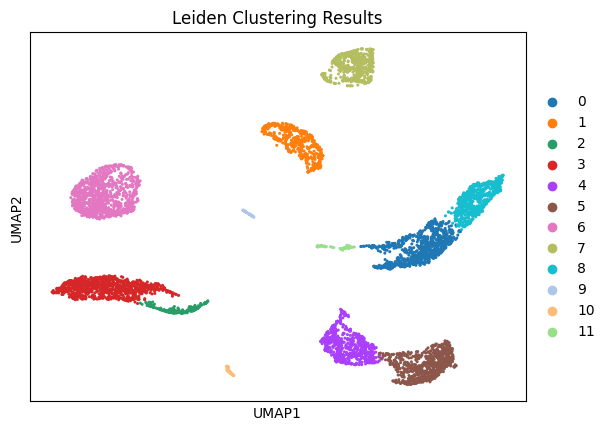

leiden
6     1028
3      948
0      861
5      756
4      673
8      634
1      513
7      508
2      194
11      56
10      50
9       47
Name: count, dtype: int64


In [4]:
# Plot the UMAP with Leiden clustering results
sc.pl.umap(data, color='leiden', title='Leiden Clustering Results')
print(data.obs['leiden'].value_counts())

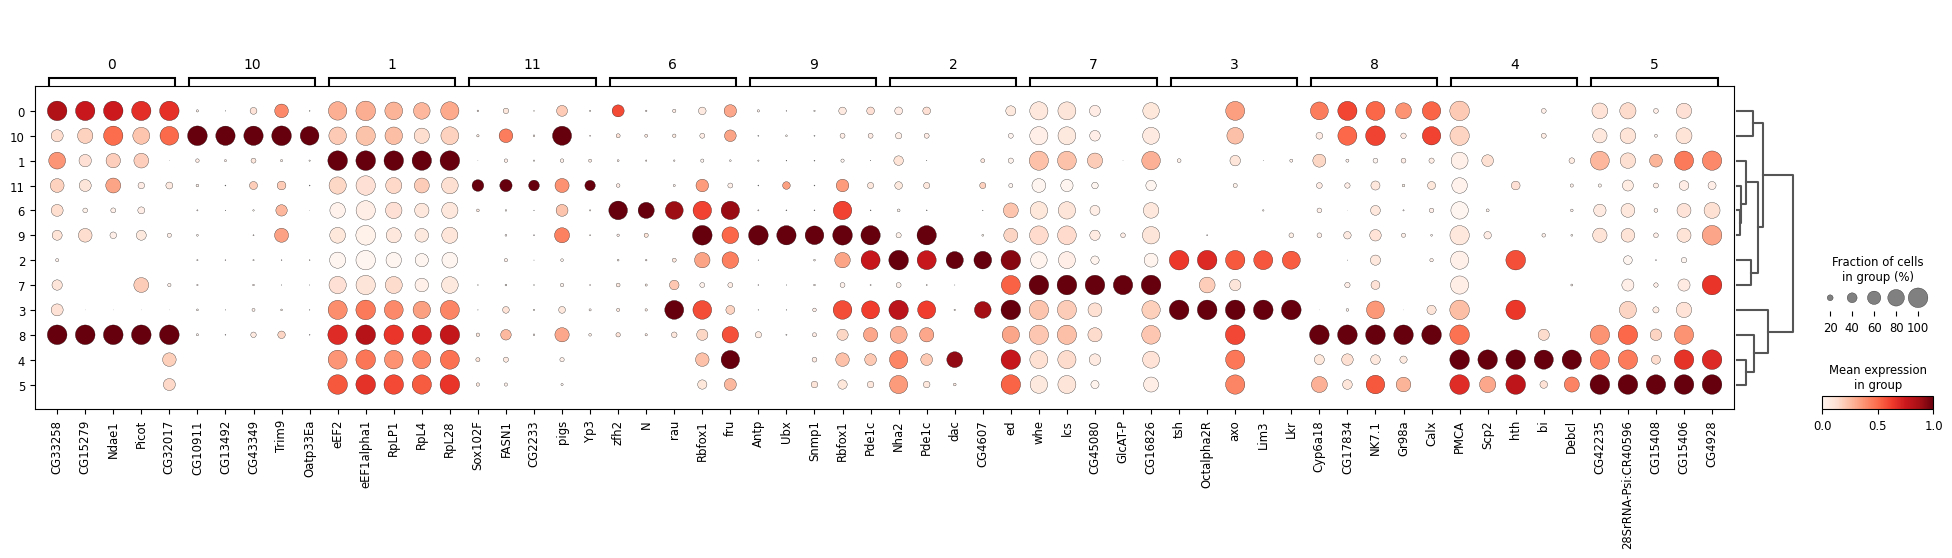

In [5]:
# Obtain cluster-specific differentially expressed genes
sc.tl.rank_genes_groups(data, groupby="leiden", method="wilcoxon")

sc.pl.rank_genes_groups_dotplot(data, groupby="leiden", standard_scale="var", n_genes=5)

In [6]:

sc.get.rank_genes_groups_df(data, group="9").head(5)

,names,scores,logfoldchanges,pvals,pvals_adj
0,Antp,11.790767,9.243091,4.355569e-32,3.466597e-28
1,Ubx,11.511864,8.956014,1.149669e-30,4.575108e-27
2,Snmp1,10.956201,6.081537,6.204979e-28,1.646181e-24
3,Rbfox1,10.698658,3.632767,1.032625e-26,2.054666e-23
4,Pde1c,10.325089,3.875282,5.426899e-25,5.748989e-22


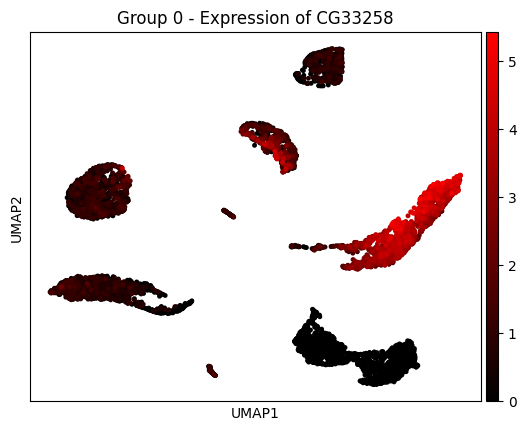

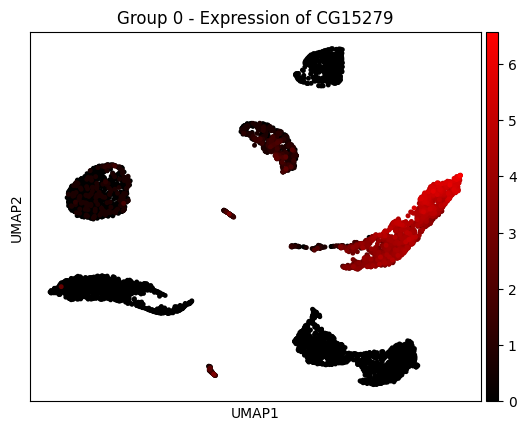

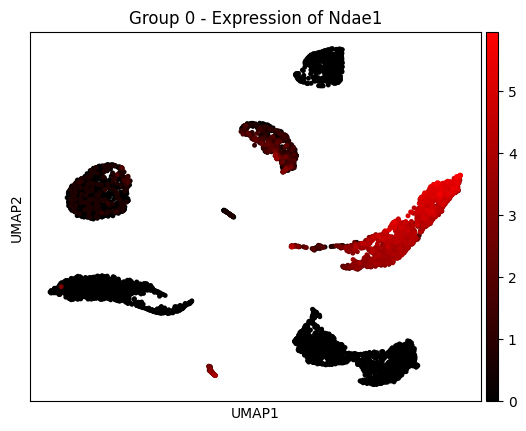

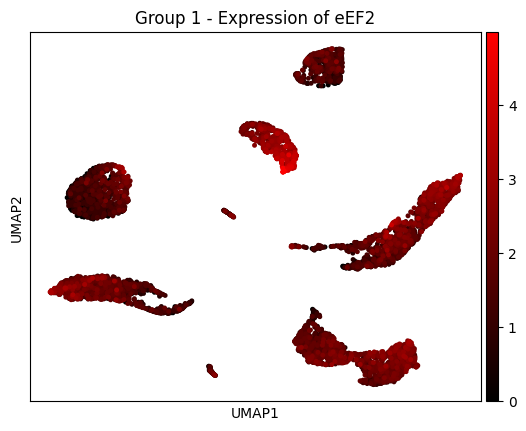

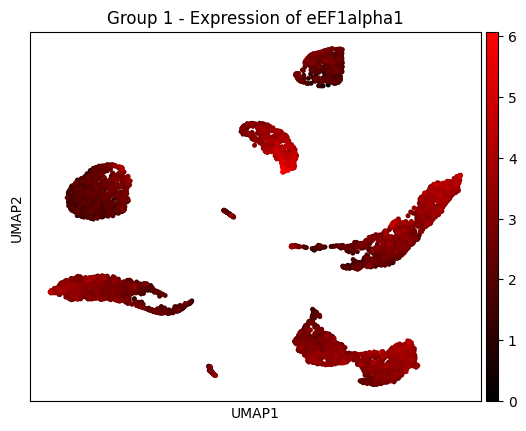

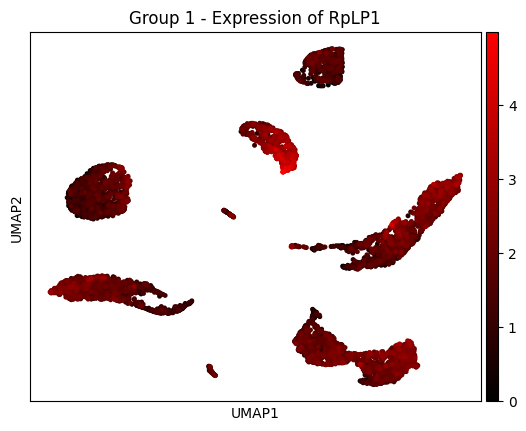

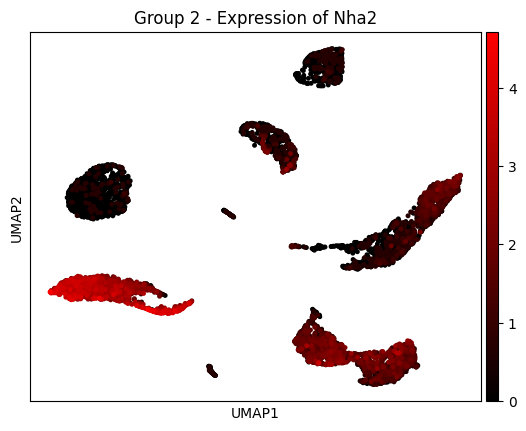

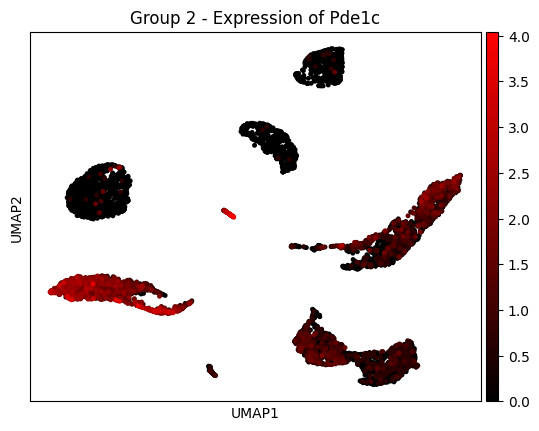

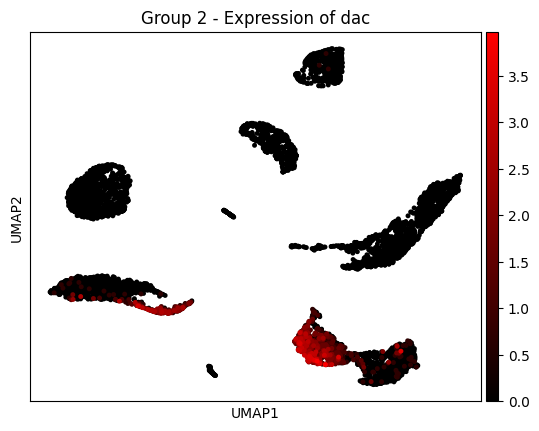

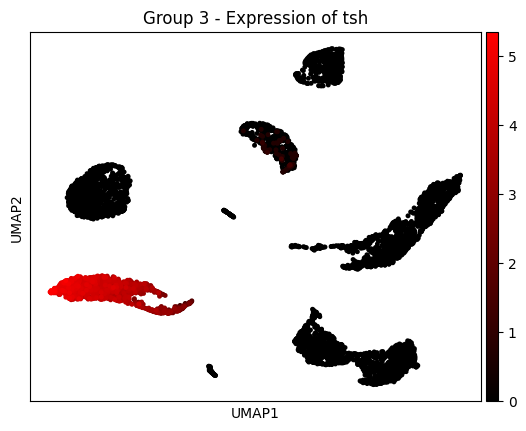

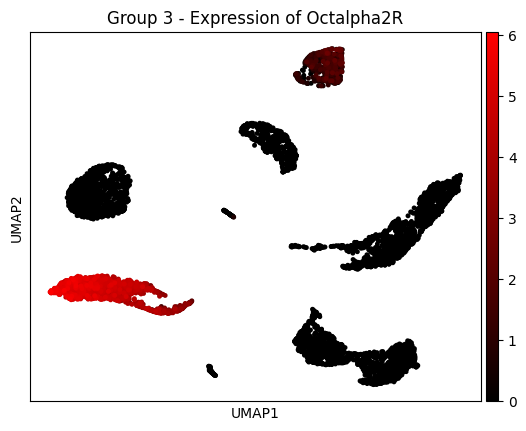

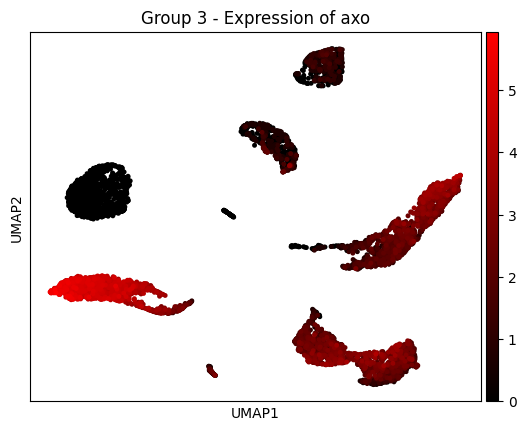

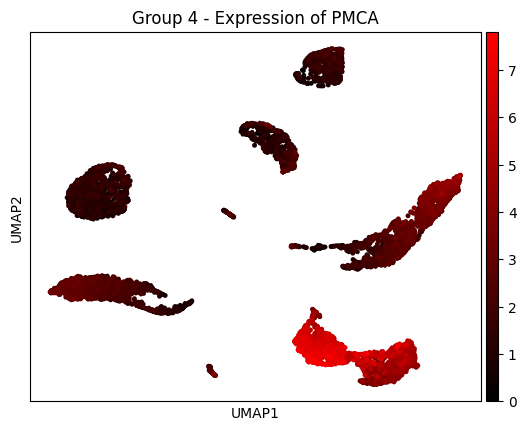

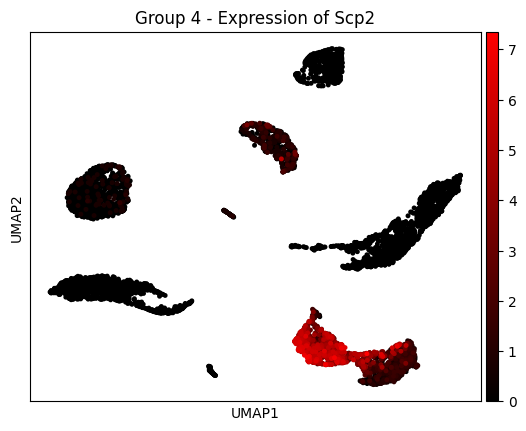

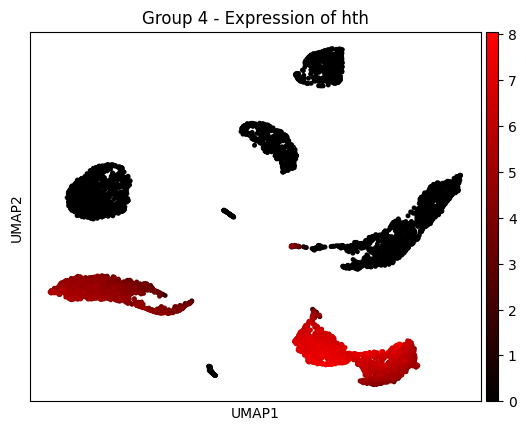

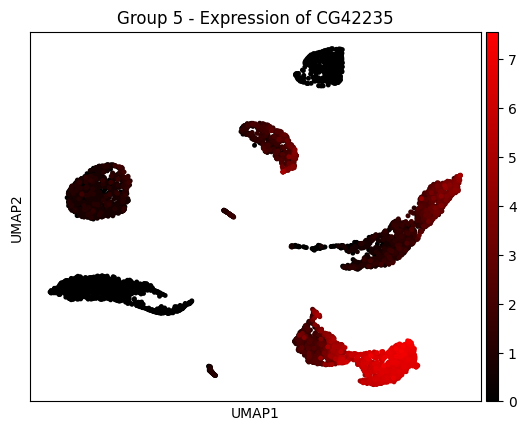

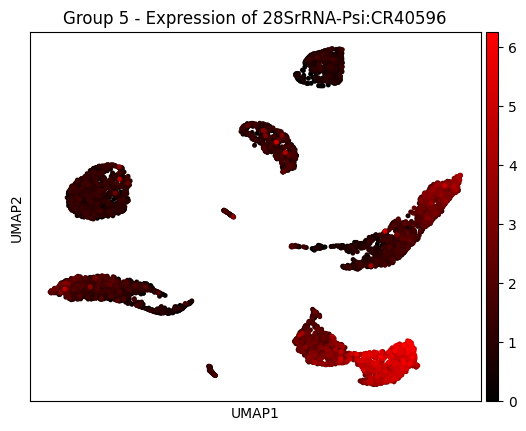

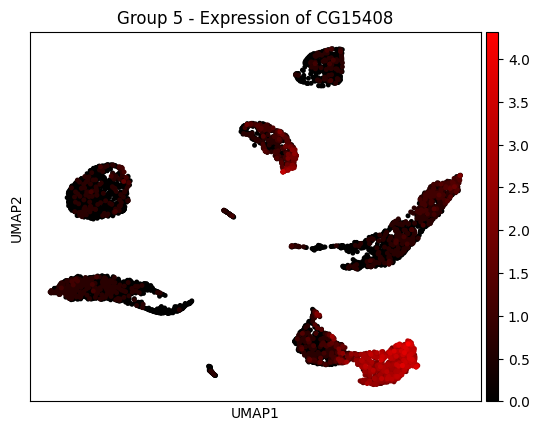

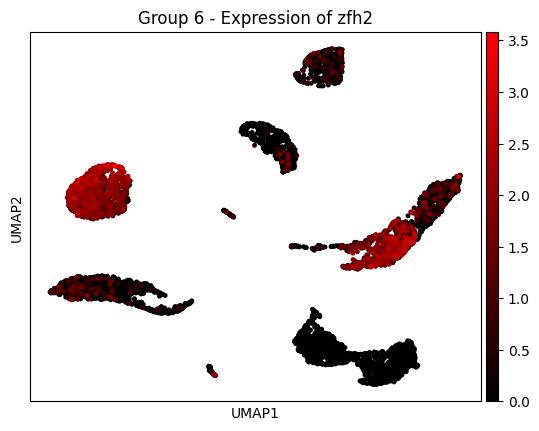

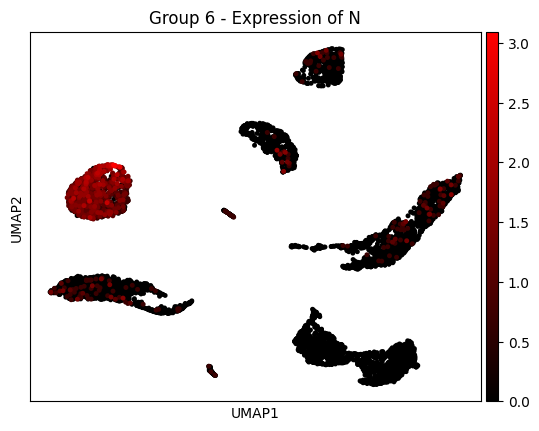

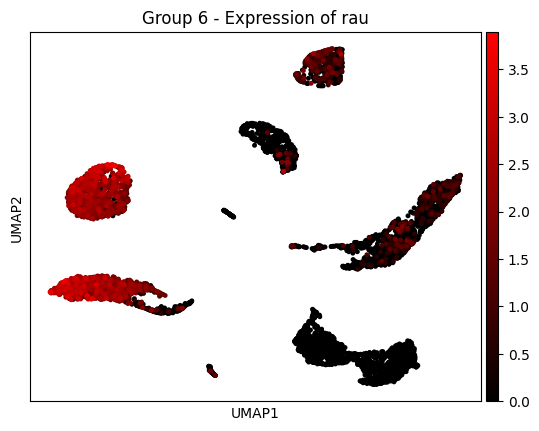

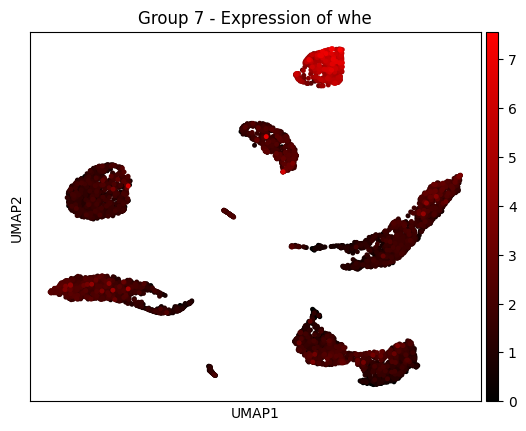

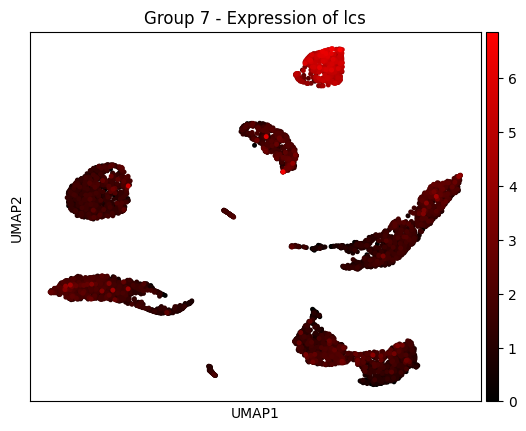

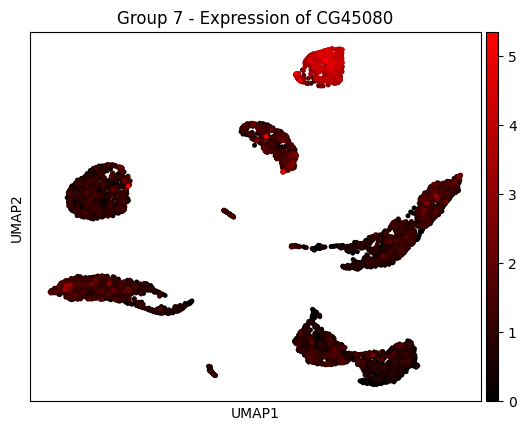

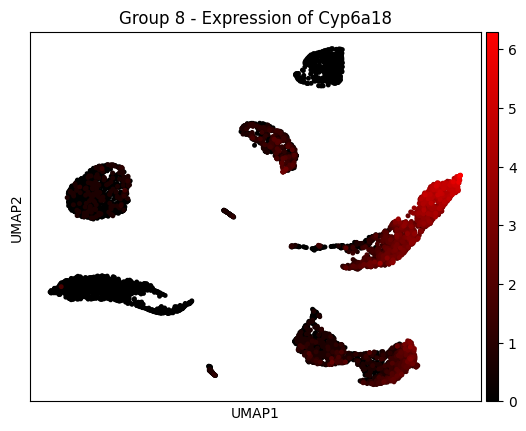

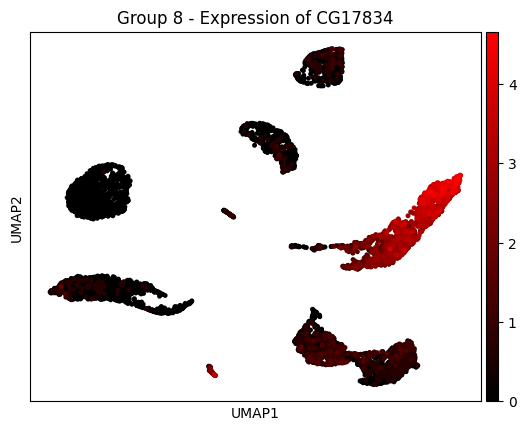

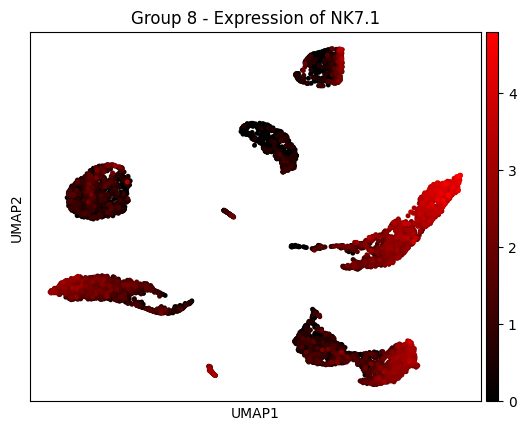

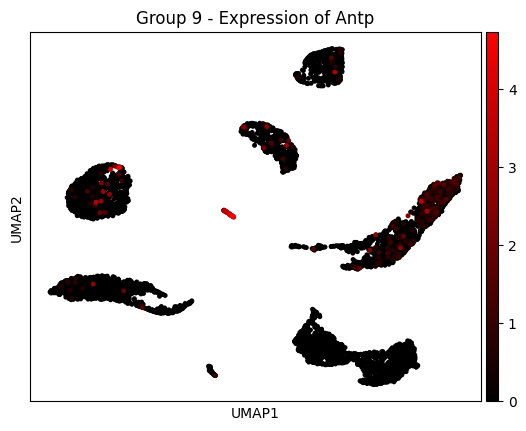

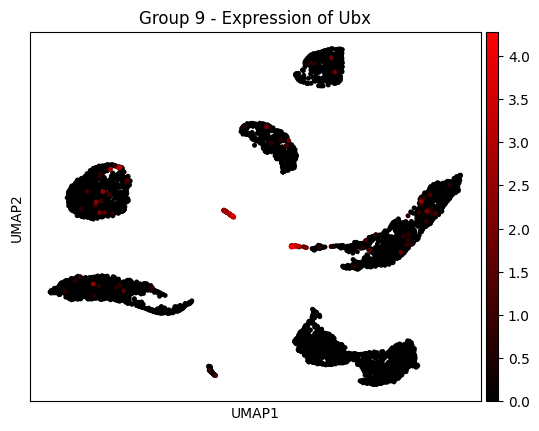

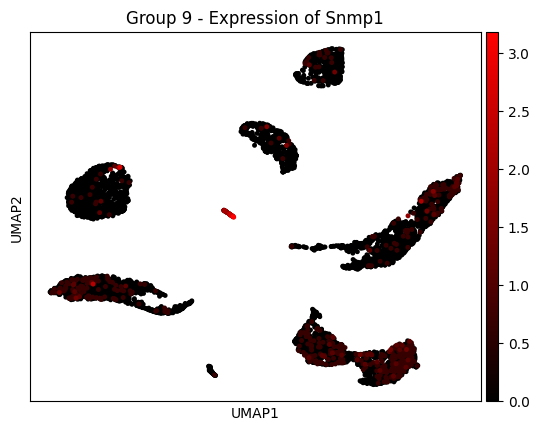

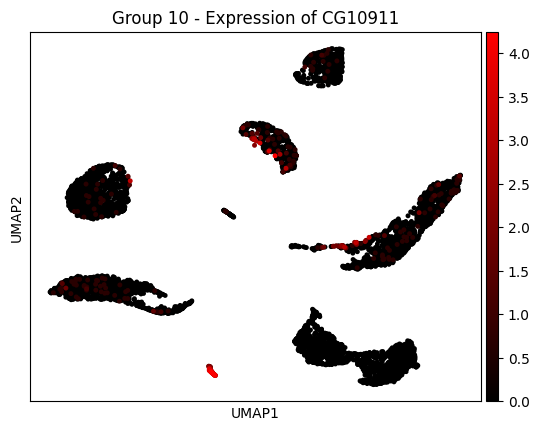

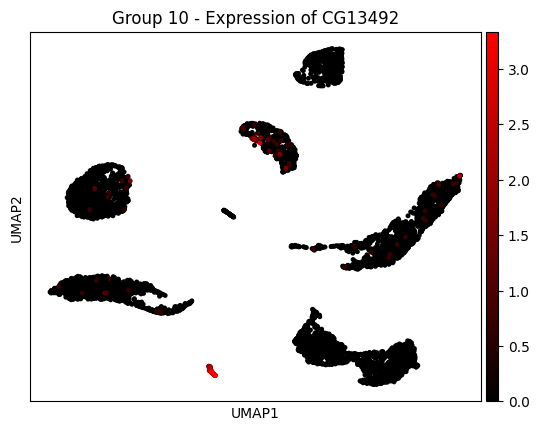

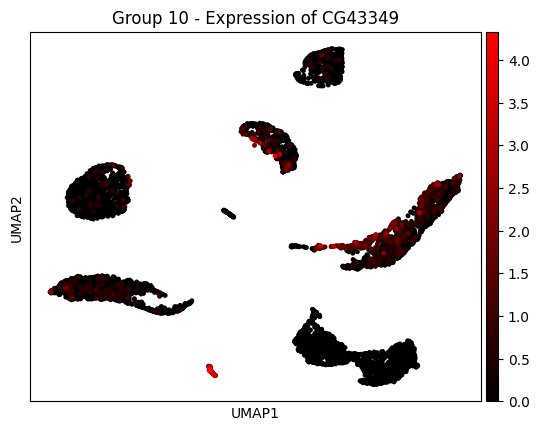

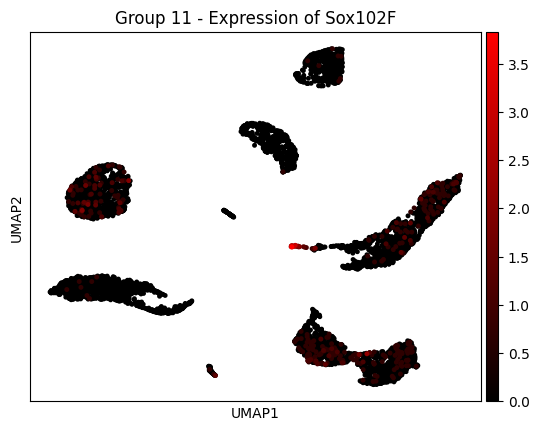

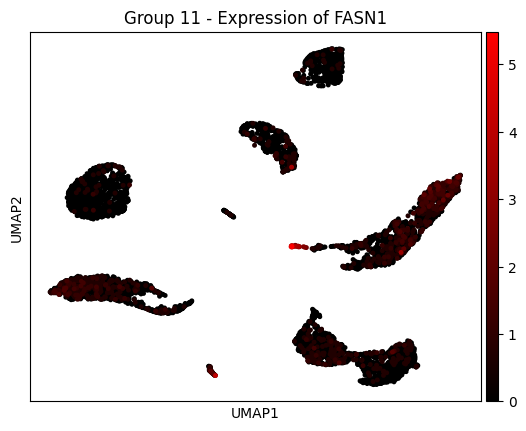

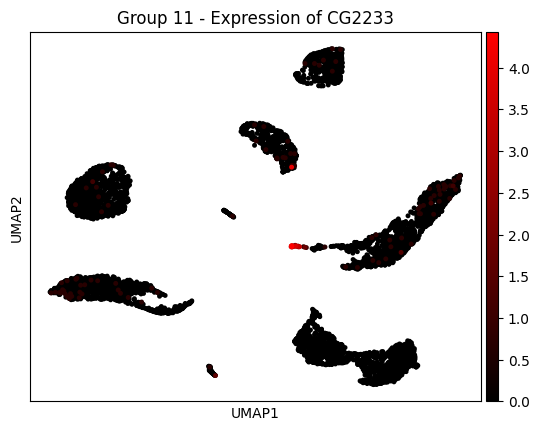

In [7]:
from matplotlib.colors import LinearSegmentedColormap

# Define a custom black-to-red colormap
black_red_cmap = LinearSegmentedColormap.from_list('black_red', ['black', 'red'])

# Extract the top 3 genes for each Leiden cluster
top_genes = []
group_titles = []

for group in data.obs['leiden'].cat.categories:
    genes = data.uns['rank_genes_groups']['names'][group][:3]  # Top 3 genes for this group
    top_genes.extend(genes)
    group_titles.extend([f"Group {group}"] * len(genes))

# Plot UMAP for each top gene, colored by expression
for gene in top_genes:
    group_name = group_titles[top_genes.index(gene)]
    sc.pl.umap(
        data,
        color=gene,
        title=f'{group_name} - Expression of {gene}',  # Title includes group name and gene
        ncols=2,
        size=50,
        cmap=black_red_cmap
    )